# The Hazard of Small Asteroids
-- A tool to produce simple graphical output of the evolution of the asteroid in the atmosphere

## Airburst Solver
The ability to solve the system of differential equations describing meteoroid entry and compute the burst altitude, burst energy and horizontal path length from the entry point.
First to create an object of planet, you can set with some defaults
<br>
- atmos_func: 'exponential (default) ' or 'tabular' or 'constant'
- atmos_filename: './armageddon/resources/AltitudeDensityTable.csv' 
- Cd=1.
- Ch=0.1
- Q=1e7
- Cl=1e-3
- alpha=0.3
- Rp=6371e3
- g=9.81
- H=8000.
- rho0=1.2

In [18]:
import solver
import matplotlib.pyplot as plt
planet = solver.Planet()
planet2 = solver.Planet(atmos_func='tabular',atmos_filename='./resources/AltitudeDensityTable.csv')

### Solve Atmospheric Entry

Solve the system of differential equations for a given impact scenario. Input parameters: 
<br>
- radius, 
- velocity, 
- density, 
- strength, 
- angle,
- init_altitude = 100e3 (default), 
- dt = 0.005 (default), 
- radians = False (default)

RK4 ODE solver is used achieving fourth-order accuracy.

In [26]:
result1 = planet.solve_atmospheric_entry(radius=10, angle=45, 
                               strength=1e5,velocity=20e3, density=3000)
result1
result_t = planet2.solve_atmospheric_entry(radius=10, angle=45, 
                               strength=1e5,velocity=20e5, density=29999)
result_t

,velocity,mass,angle,altitude,distance,radius,time
0,2.000000e+06,1.256595e+08,45.000000,100000.000000,0.000000,10.000000,0.000
1,2.000000e+06,1.253001e+08,44.937324,92932.799933,6969.407295,10.140516,0.005
2,2.000000e+06,1.249291e+08,44.874510,85873.352293,13954.062082,10.281304,0.010
3,2.000000e+06,1.241676e+08,44.811559,78821.682714,20953.997430,10.476688,0.015
4,1.999999e+06,1.216750e+08,44.748470,71777.818121,27969.245197,10.821722,0.020
5,1.999995e+06,1.139779e+08,44.685244,64741.788821,34999.833931,11.403643,0.025
6,1.999984e+06,9.133686e+07,44.621879,57713.635851,42045.781439,12.338544,0.030
7,1.999918e+06,2.566337e+07,44.558374,50693.453827,49107.051533,13.785635,0.035
8,2.000061e+06,-1.804143e+08,44.494737,43681.184920,56183.760972,16.022630,0.040
9,2.000148e+06,-9.863435e+08,44.430954,36676.346460,63276.457735,19.692953,0.045


### Calculate Energy

Calculate the kinetic energy lost per unit altitude in kilotons TNT per km, for a given solution. And output a data frame with columns for the velocity, mass, angle, altitude, horizontal distance, radius and an additional dedz (the kinetic energy lost per unit altitude).

In [27]:
result2 = planet.calculate_energy(result_t)
result2

type <class 'pandas.core.frame.DataFrame'>


,velocity,mass,angle,altitude,distance,radius,time,dedz
0,2.000000e+06,1.256595e+08,45.000000,100000.000000,0.000000,10.000000,0.000,2.471783e+04
1,2.000000e+06,1.253001e+08,44.937324,92932.799933,6969.407295,10.140516,0.005,2.471783e+04
2,2.000000e+06,1.249291e+08,44.874510,85873.352293,13954.062082,10.281304,0.010,3.836546e+04
3,2.000000e+06,1.241676e+08,44.811559,78821.682714,20953.997430,10.476688,0.015,1.103570e+05
4,1.999999e+06,1.216750e+08,44.748470,71777.818121,27969.245197,10.821722,0.020,3.459542e+05
5,1.999995e+06,1.139779e+08,44.685244,64741.788821,34999.833931,11.403643,0.025,1.031172e+06
6,1.999984e+06,9.133686e+07,44.621879,57713.635851,42045.781439,12.338544,0.030,3.005062e+06
7,1.999918e+06,2.566337e+07,44.558374,50693.453827,49107.051533,13.785635,0.035,9.257452e+06
8,2.000061e+06,-1.804143e+08,44.494737,43681.184920,56183.760972,16.022630,0.040,3.451637e+07
9,2.000148e+06,-9.863435e+08,44.430954,36676.346460,63276.457735,19.692953,0.045,1.604367e+08


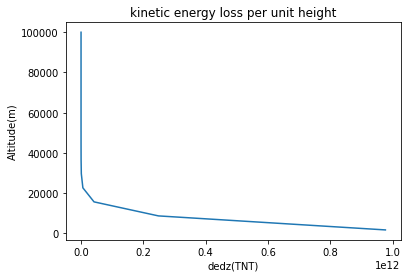

In [28]:
x = result2.dedz
y = result2.altitude
plt.title('kinetic energy loss per unit height')
plt.xlabel('dedz(TNT)')
plt.ylabel('Altitude(m)')
plt.plot(x,y)

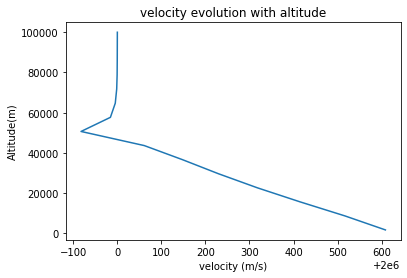

In [30]:
x2 = result2.velocity
y2 = result2.altitude
plt.title('velocity evolution with altitude')
plt.xlabel('velocity (m/s)')
plt.ylabel('Altitude(m)')
plt.plot(x2,y2)

### Analyse Outcome

Inspect a pre-found solution to calculate the impact and airburst status. Output details of the impact event containing outcome (airburst or cratering), burst_peak_dedz, burst_altitude, burst_distance, burst_energy.

In [29]:
planet.analyse_outcome(result2)

resi -1772017.3275194613


{'outcome': 'Cratering',
 'burst_peak_dedz': 976430557519.9355,
 'burst_altitude': 1767.4483666766055,
 'burst_distance': 98978.08406267916,
 'burst_energy': 3545173145362.7373}